In [1]:
## Initialize ##
!pip install inspyred
import os
import pickle
import json
import shutil
# As needed, reset cwd to jupyter notebook location
nb_path = ("/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly2/batch_run_files/")
if os.getcwd() != nb_path:
    os.chdir(nb_path)

## USER INPUT REQUIRED ##
## Edit the following parameters as needed ##
## Edit params in the batch_run_files folder as needed (with care) ##
#Evol Batch Config Params
'''
BATCH RUN FOLDER
'''
#Prepare Batch_Run_Folder and Initial Files

output_path = nb_path.replace('batch_run_files', 'output')
run_name = '24-3-25_15sec_EE_gen5_cand29_init' ### Change this to a unique name for the batch run
run_path = output_path + run_name
overwrite_run = False #True will overwrite any existing run with the same name
continue_ = True #True will continue from the last generation of the run
#make sure batch_run_path does not exist. Avoid overwriting data from any Run
#overwrite_run = True #comment out later, this is for debugging
if continue_ is False:
    assert overwrite_run or not os.path.exists(run_path), f"Run {run_path} already exists. Set overwrite_run to True to overwrite."
if overwrite_run and os.path.exists(run_path):    
    shutil.rmtree(run_path)

# Create a directory to save the batch files
if not os.path.exists(run_path):
    os.makedirs(run_path)

'''
BATCH CONFIG
'''
import json

# Create a dictionary with the given variables and their values
pop_per_core = 12
core_num = 4
pop_size = pop_per_core * core_num
num_elite_percent = 7.5/100 # top 10% of the population will be copied to the next generation, this is considered high-medium elitism
num_elites = int(num_elite_percent * pop_size)
#duration_seconds = 5
#these updated params are based on the results from the following path:
selected_cand = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/reports/24-3-24_5sec_EEsearch/gen_5_cand_29__param_summary_row.png'
selected_cfg = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/output/24-3-24_5sec_EEsearch/gen_5/gen_5_cand_29_cfg.json'
with open(selected_cfg, 'r') as f:
    initCfg = json.load(f)
batch_config_options = {
    "run_path": run_path,
    'batchLabel': os.path.basename(run_path),
    "method": "evol",
    "core_num": core_num,
    "nodes": 1,
    #"pop_per_core": 1,
    #"duration_seconds": 5,
    "pop_size": pop_size,
    "max_generations": 2000,
    "time_sleep": 10, #seconds
    "maxiter_wait": 6*40, #6itersx10sec/itersx30sec/min = 30 minutes per gen?
    "skip": True,
    "num_elites": num_elites,
    "initCfg": initCfg,
}

# Write the dictionary to a JSON file
with open("batch_config_options.json", "w") as f:
    json.dump(batch_config_options, f)

 Could not create 
Saving netParams to const_netParams.json ... 


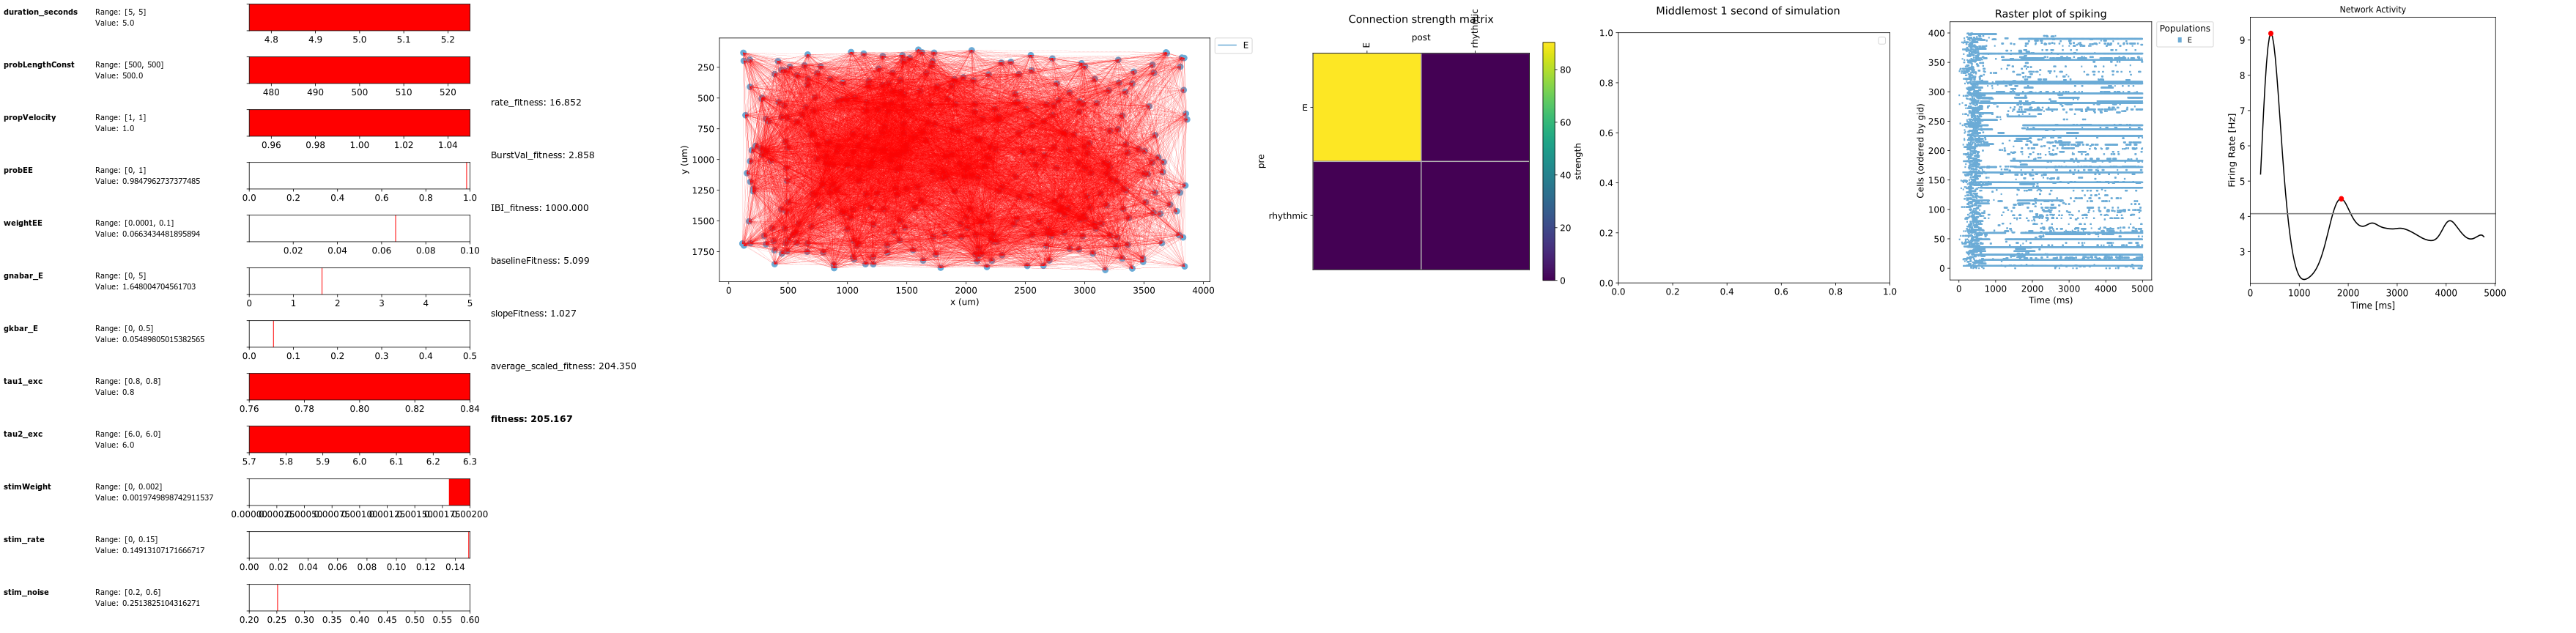

.btr files successfully moved.
run_name:  24-3-25_15sec_EE_gen5_cand29_init
output_path:  /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly2/output/
run_path:  /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly2/output/24-3-25_15sec_EE_gen5_cand29_init
overwrite_run:  False
run_path:  /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly2/output/24-3-25_15sec_EE_gen5_cand29_init
pop_size:  48
core_num:  4
nodes_per_core:  1
pop_per_core:  None
num_elites:  3
duration_seconds:  7.5
max_generations:  2000
time_sleep:  10
maxiter_wait:  240
skip:  True


In [2]:
'''
PARAMS
'''
# Create a directory to save the batch files
from netpyne import specs
from param_space import get_param_space, get_param_space_excite_only

## Prepare Parameter Space for Batch Run ##
duration_seconds = 7.5
#params = get_param_space(duration_seconds)
params = get_param_space_excite_only(duration_seconds)
param_space = params.copy()

#MODIFY SPECIFIC PARAMS FOR THIS RUN

#show png from selected_cand in jupyter notebook
from IPython.display import Image, display
display(Image(filename=selected_cand))

# stim_weight_shift = param_space['stimWeight'][1]*2
# param_space['stimWeight'] = [stim_weight+stim_weight_shift for stim_weight in param_space['stimWeight']]
# print(f'Modified stimWeight Range: {param_space["stimWeight"]}')
# stim_rate_shift = param_space['stim_rate'][1]*2
# param_space['stim_rate'] = [stim_rate+stim_rate_shift for stim_rate in param_space['stim_rate']]
# print(f'Modified stim_rate Range: {param_space["stim_rate"]}')

with open(f'{run_path}/param_space.pickle', 'wb') as handle:
    pickle.dump(param_space, handle, protocol=pickle.HIGHEST_PROTOCOL)
#Also save as Json for easy reading
filename = f'{run_path}/param_space.json'
with open(filename, 'w') as file:
    json.dump(param_space, file, indent=4)


##cleanup
from batch_run_files.aw_batch_tools import move_btr_files
move_btr_files() #move any btr files to btr subfolder in batch_run_files

##print
from pprint import pprint
print("run_name: ", run_name)
print("output_path: ", output_path)
print("run_path: ", run_path)
print("overwrite_run: ", overwrite_run)
print("run_path: ", batch_config_options.get("run_path"))
print("pop_size: ", batch_config_options.get("pop_size"))
print("core_num: ", batch_config_options.get("core_num"))
print("nodes_per_core: ", batch_config_options.get("nodes"))
print("pop_per_core: ", batch_config_options.get("pop_per_core"))
print("num_elites: ", batch_config_options.get("num_elites"))
print("duration_seconds: ", duration_seconds)
print("max_generations: ", batch_config_options.get("max_generations"))
print("time_sleep: ", batch_config_options.get("time_sleep"))
print("maxiter_wait: ", batch_config_options.get("maxiter_wait"))
print("skip: ", batch_config_options.get("skip"))

In [3]:
## Run Batch ##
import subprocess
from pprint import pprint
import pickle

# Define the command
cores = batch_config_options['core_num'] 
command = f"mpiexec -np {cores} nrniv -mpi batchRun.py"

# Run the command
debug = False
skip = False
if debug:
    from batch_run_files.batchRun import batchRun, get_batch_config

    #Limit batching for debugging
    core_num = 1
    max_generations = 1
    pop_size = 4
    num_elites = 1
    batch_config_options['num_elites'] = num_elites
    batch_config_options['core_num'] = core_num
    batch_config_options['max_generations'] = max_generations
    batch_config_options['pop_size'] = pop_size
    # Write the dictionary to a JSON file
    with open("batch_config_options.json", "w") as f:
        json.dump(batch_config_options, f)
    
    batch_config = get_batch_config(batch_config_options = batch_config_options)
    # Load the dictionary from the JSON file
    # with open('batch_config.pickle', 'rb') as f:
    #     batch_config = pickle.load(f)
    assert 'method' in batch_config, 'method must be specified in batch_config'
    assert 'skip' in batch_config['runCfg'], 'skip must be specified in batch_config'
    assert 'batchLabel' in batch_config, 'batchLabel must be specified in batch_config'
    #after batch_config is loaded, delete it, there's a copy in the batch_run_path
    # #os.remove('batch_config.pickle')
    
    batchRun(
        batchLabel = batch_config_options['batchLabel'], 
        #method = 'grid', 
        method = 'evol',
        skip = skip,
        batch_config = batch_config,
        ) 
else:
    print(command + '\n')
    jobName = f"{run_path}/evol_batchRun"
    process = subprocess.Popen(command.split(' '), stdout=open(jobName + '.run', 'w'), stderr=open(jobName + '.err', 'w'))
    # Get the output and errors, if any
    stdout, stderr = process.communicate()
    # Print the output
    if stdout: pprint(stdout)
    # Print the errors
    if stderr: pprint(stderr)

mpiexec -np 4 nrniv -mpi batchRun.py



KeyboardInterrupt: 

In [ ]:
## Prepare Folder for Roy
import shutil
import os
import fnmatch

#output_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/output'
output_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/output'
reports_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/reports'
#reports_path = '/mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.0_optimizing_75-25/reports'
overwrite = False

#walk through output_path, find all .svg and .png files, copy to new folder
for root, dirs, files in os.walk(output_path):
    if '.archive' in root: continue
    for file in files:
        report_file_types = ['.svg', '.png', '.pdf', '.csv', '.run', '.err', '.json', '.log']
        image_file_types = ['.svg', '.png'] 
        info_file_types = ['.pdf', 
                           #'.csv', 
                           '.run', '.err', '.json', '.log'] 
        if file.endswith(tuple(report_file_types)):
            file_path = os.path.join(root, file)
            new_path = file_path.replace(output_path, reports_path)
            new_dir = os.path.dirname(new_path)

            if file.endswith(tuple(info_file_types)):
               # Split the file path into directories
                directories = file_path.split(os.sep)
                # Check if any directory matches the pattern "gen_*"
                if any(fnmatch.fnmatch(dir, 'gen_*') for dir in directories):
                    continue  # Skip info files in gen folders
                new_dir = os.path.join(new_dir, 'batch_run_files')
                new_path = os.path.join(new_dir, file)
            
            #If file name contains "param_summary_row", copy to the grandparent folder instead
            if 'param_summary_row.png' in file:
                new_dir = os.path.dirname(new_dir)
                new_dir = os.path.dirname(new_dir)
                new_path = os.path.join(new_dir, file)
            
            #If file name contains ".csv"
            if '.csv' in file:
                #new_dir = os.path.dirname(new_dir)
                new_path = os.path.join(new_dir, file)

            #make sure the new directory exists
            if not os.path.exists(new_dir):
                os.makedirs(new_dir)
            if not os.path.exists(new_path) and overwrite is False:
                shutil.copy(file_path, new_path)
                print(f'Copied {file_path} to {new_path}')
            elif overwrite is True:
                shutil.copy(file_path, new_path)
                print(f'Copied {file_path} to {new_path}')

Copied /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/output/24-3-23_5sec_EEsearch/evol_batchRun.run to /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/reports/24-3-23_5sec_EEsearch/batch_run_files/evol_batchRun.run
Copied /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/output/24-3-23_5sec_EEsearch/param_space.json to /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/reports/24-3-23_5sec_EEsearch/batch_run_files/param_space.json
Copied /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2DNet_simulations/BurstingPlotDevelopment/nb5.1_optimizing_EEonly/output/24-3-23_5sec_EEsearch/evol_batchRun.err to /mnt/disk15tb/adam/git_workspace/netpyne_2DNetworkSimulations/2